### Import  Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("all_alpha_08 (1).csv")

In [3]:
data.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


### Data Cleaning
Replace all the column names that has space(s) between them with an Underscore

In [4]:
header = data.columns

In [5]:
new_header = []
for i in header:
    if " " in i:
        columnheader = i.replace(" ", "_")
        new_header.append(columnheader)
    else:
        new_header.append(i)

In [6]:
print(new_header)

['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales_Area', 'Stnd', 'Underhood_ID', 'Veh_Class', 'Air_Pollution_Score', 'FE_Calc_Appr', 'City_MPG', 'Hwy_MPG', 'Cmb_MPG', 'Unadj_Cmb_MPG', 'Greenhouse_Gas_Score', 'SmartWay']


In [7]:
# assign the new columns to the DataFrame 
data.columns = new_header

In [8]:
data.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales_Area,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,FE_Calc_Appr,City_MPG,Hwy_MPG,Cmb_MPG,Unadj_Cmb_MPG,Greenhouse_Gas_Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


Check the data types of all the columns

In [9]:
data.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales_Area               object
Stnd                     object
Underhood_ID             object
Veh_Class                object
Air_Pollution_Score      object
FE_Calc_Appr             object
City_MPG                 object
Hwy_MPG                  object
Cmb_MPG                  object
Unadj_Cmb_MPG           float64
Greenhouse_Gas_Score     object
SmartWay                 object
dtype: object

In [10]:
# Identify the Null values in the dataset
data.isna().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales_Area                0
Stnd                      0
Underhood_ID              0
Veh_Class                 0
Air_Pollution_Score       0
FE_Calc_Appr            199
City_MPG                199
Hwy_MPG                 199
Cmb_MPG                 199
Unadj_Cmb_MPG           199
Greenhouse_Gas_Score    199
SmartWay                  0
dtype: int64

In [11]:
# drop all Null values
data.dropna(inplace = True)

In [12]:
# Confirmed that all Null values has been dropped
data.isna().sum()

Model                   0
Displ                   0
Cyl                     0
Trans                   0
Drive                   0
Fuel                    0
Sales_Area              0
Stnd                    0
Underhood_ID            0
Veh_Class               0
Air_Pollution_Score     0
FE_Calc_Appr            0
City_MPG                0
Hwy_MPG                 0
Cmb_MPG                 0
Unadj_Cmb_MPG           0
Greenhouse_Gas_Score    0
SmartWay                0
dtype: int64

In [13]:
# Cleaning the Cyl Column: the column contain both integer and string
cleaned_cyl= data.Cyl.apply(lambda x: x.strip("()").split(" ")[0])

In [14]:
data.Cyl = cleaned_cyl
data_type = data.Cyl.astype(int)

In [15]:
data.Cyl = data_type

In [16]:
data.Cyl.dtypes

dtype('int32')

### Cleaning Columns and Change column data types
Some columns data are integer but were represented as an object on the DataFrame

In [17]:
cleaned_Air = data.Air_Pollution_Score.apply(lambda x: x.split("/")[0])

In [18]:
cleaned_Air =cleaned_Air.astype(float)

In [19]:
data.Air_Pollution_Score = cleaned_Air

In [20]:
data.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales_Area,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,FE_Calc_Appr,City_MPG,Hwy_MPG,Cmb_MPG,Unadj_Cmb_MPG,Greenhouse_Gas_Score,SmartWay
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7.0,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6.0,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7.0,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6.0,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7.0,Drv,16,24,19,24.5629,5,no


In [21]:
# define a function the can be reused for cleaning other columns
def convert_to_number(column_name):
    total_string = []
    for i in column_name:
        if "/" in i:
            new_string = int(i.split("/")[1])
            total_string.append(new_string)
        else:
            total_string.append(int(i))
    return total_string

In [22]:
# Apply function to other columns
City_MPG = convert_to_number(data.City_MPG)
data.City_MPG = City_MPG

In [23]:
Hwy_MPG = convert_to_number(data.Hwy_MPG)
data.Hwy_MPG = Hwy_MPG

In [24]:
Greenhouse_Gas = convert_to_number(data.Greenhouse_Gas_Score)
data.Greenhouse_Gas_Score = Greenhouse_Gas

In [25]:
# confirm that the data types has been changed
data.dtypes

Model                    object
Displ                   float64
Cyl                       int32
Trans                    object
Drive                    object
Fuel                     object
Sales_Area               object
Stnd                     object
Underhood_ID             object
Veh_Class                object
Air_Pollution_Score     float64
FE_Calc_Appr             object
City_MPG                  int64
Hwy_MPG                   int64
Cmb_MPG                  object
Unadj_Cmb_MPG           float64
Greenhouse_Gas_Score      int64
SmartWay                 object
dtype: object

In [26]:
# Check for duplicates and keep first occurence
data[data.duplicated()]
data.drop_duplicates(keep = "first", inplace = True)

In [38]:
data[data.duplicated()]

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales_Area,Stnd,Underhood_ID,Veh_Class,Air_Pollution_Score,FE_Calc_Appr,City_MPG,Hwy_MPG,Cmb_MPG,Unadj_Cmb_MPG,Greenhouse_Gas_Score,SmartWay


In [27]:
# save cleaned dataset
cleaned_fuel_data = data.to_csv("cleaned_fuel_data.csv")

### Exploratory Data Analysis

In [28]:
data.describe()

,Displ,Cyl,Air_Pollution_Score,City_MPG,Hwy_MPG,Unadj_Cmb_MPG,Greenhouse_Gas_Score
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,3.593997,6.100500,6.328786,17.132333,23.725784,23.943561,5.088677
std,1.269747,1.845585,0.990696,3.982588,4.714586,6.353077,1.877227
min,1.300000,2.000000,1.000000,8.000000,13.000000,10.018400,0.000000
25%,2.500000,4.000000,6.000000,14.000000,20.000000,19.143100,4.000000
50%,3.500000,6.000000,6.000000,17.000000,24.000000,23.935100,5.000000
75%,4.550000,8.000000,7.000000,20.000000,27.000000,27.888350,6.000000
max,8.400000,16.000000,9.500000,48.000000,45.000000,65.777800,10.000000


In [29]:
data.corr()

,Displ,Cyl,Air_Pollution_Score,City_MPG,Hwy_MPG,Unadj_Cmb_MPG,Greenhouse_Gas_Score
Displ,1.000000,0.897139,-0.211347,-0.796882,-0.804154,-0.777085,-0.842698
Cyl,0.897139,1.000000,-0.207935,-0.757640,-0.730629,-0.703688,-0.813589
Air_Pollution_Score,-0.211347,-0.207935,1.000000,0.307396,0.284063,0.304071,0.285949
City_MPG,-0.796882,-0.757640,0.307396,1.000000,0.906703,0.910486,0.913372
Hwy_MPG,-0.804154,-0.730629,0.284063,0.906703,1.000000,0.866035,0.933399
Unadj_Cmb_MPG,-0.777085,-0.703688,0.304071,0.910486,0.866035,1.000000,0.849960
Greenhouse_Gas_Score,-0.842698,-0.813589,0.285949,0.913372,0.933399,0.849960,1.000000


In [30]:
Sales_Area = data.groupby(data.Sales_Area)
Drive = data.groupby(data.Drive)

### Which Sales Area has the most city MPG(miles per gallon)
The bar plot below shows that california has the highest city MPG

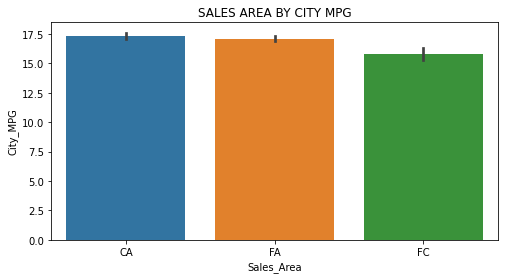

In [46]:
# Which Sales Area has the most city MPG(miles per gallon)
plt.figure(figsize=(8,4))
plt.title("Sales Area by City MPG".upper())
sns.barplot(data =data,  x= data.Sales_Area, y=data.City_MPG);

### Which Sales Area has the most Highway MPG(miles per gallon)
The box plot below show that Ca and FA has about thesame Highway MPG

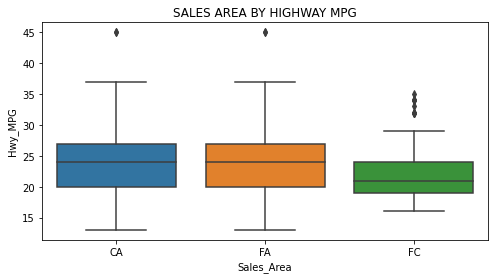

In [48]:
# Which Sales Area has the most Highway MPG(miles per gallon)
plt.figure(figsize=(8,4))
plt.title("Sales Area by Highway MPG".upper())
sns.boxplot(data = data, x = data.Sales_Area, y= data.Hwy_MPG);

###  Which drive has the most Air pollution score?
The bar plot below shows that 2WD vehicles have the most Air pollution score

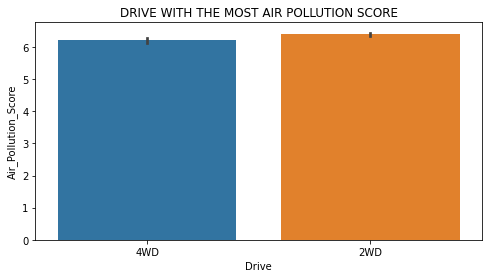

In [49]:
# Which drive has the most Air pollution score?
Drive.get_group("2WD")
plt.figure(figsize=(8,4))
plt.title("Drive with the most Air pollution Score".upper())
sns.barplot(data = data, x= data.Drive, y= data.Air_Pollution_Score);

### Which vehicle class has the highest Air pollution score and in which city?
The multiple column barplot below shows that california's large cars have the highest Air pollution Score

In [35]:
# This code picks 10 random rows for each category in the Veh_Class
ran_values = data.groupby("Veh_Class", group_keys=False).apply(lambda x:x.sample(10))

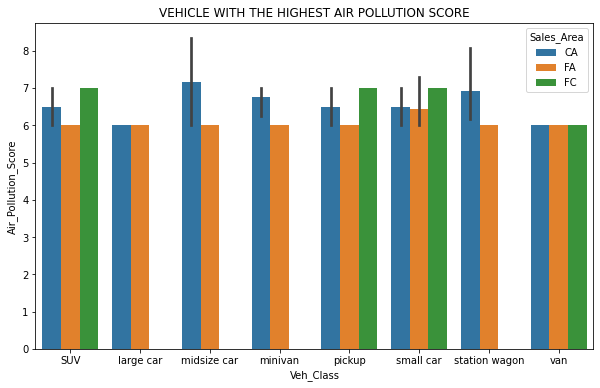

In [53]:
plt.figure(figsize=[10,6])
plt.title("Vehicle with the highest Air pollution Score".upper())
sns.barplot(data =ran_values, x = "Veh_Class", y= "Air_Pollution_Score", hue ="Sales_Area");

#### Which Drive contribute most to Green house gas score?
The bar plot below shows that 2WD vehicles contribute the most to Green house gas score

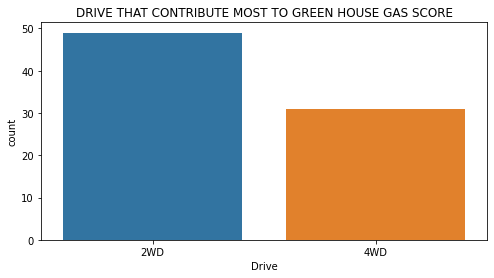

In [54]:
# Which Drive contribute most to Green house gas score?
plt.figure(figsize=[8,4])
plt.title("Drive that contribute most to Green house gas score".upper())
sns.countplot(x="Drive", data=ran_values);